<a href="https://colab.research.google.com/github/secondaryfeed/mlzoomcamp-code/blob/main/mlzoomcamp_homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv'
!wget $data

--2021-09-27 06:21:20--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7077973 (6.8M) [text/plain]
Saving to: ‘AB_NYC_2019.csv’

AB_NYC_2019.csv     100%[===================>]   6.75M  --.-KB/s    in 0.03s   

2021-09-27 06:21:20 (230 MB/s) - ‘AB_NYC_2019.csv’ saved [7077973/7077973]



In [3]:
df = pd.read_csv('AB_NYC_2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [5]:
features = ['neighbourhood_group','room_type','latitude','longitude','price','minimum_nights','number_of_reviews',
            'reviews_per_month','calculated_host_listings_count','availability_365']
df = df[features]

In [6]:
df.isnull().sum()

neighbourhood_group                   0
room_type                             0
latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
df['reviews_per_month'] = df.reviews_per_month.fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Question 1
##### What is the most frequent observation (mode) for the column 'neighbourhood_group'?
*   Split your data in train/val/test sets, with 60%/20%/20% distribution.
*   Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
*   Make sure that the target value ('price') is not in your dataframe.





In [8]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 42)

In [9]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [10]:
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

del df_train['price']
del df_val['price']
del df_test['price']

In [11]:
len(df), len(df_train), len(df_val), len(df_test)

(48895, 29337, 9779, 9779)

In [12]:
y_train

array([ 99,  57,  70, ..., 299,  65,  92])

In [13]:
df_train

,neighbourhood_group,room_type,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,brooklyn,entire_home/apt,40.72760,-73.94495,3,29,0.70,13,50
1,manhattan,private_room,40.70847,-74.00498,1,0,0.00,1,7
2,bronx,entire_home/apt,40.83149,-73.92766,40,0,0.00,1,0
3,brooklyn,entire_home/apt,40.66448,-73.99407,2,3,0.08,1,0
4,manhattan,private_room,40.74118,-74.00012,1,48,1.80,2,67
...,...,...,...,...,...,...,...,...,...
29332,brooklyn,private_room,40.71748,-73.95685,6,5,0.13,1,0
29333,brooklyn,private_room,40.66397,-73.98538,1,7,0.17,2,0
29334,manhattan,private_room,40.79994,-73.97001,1,1,0.64,1,88
29335,brooklyn,private_room,40.69585,-73.96344,60,0,0.00,1,0


In [14]:
df_full_train = df_full_train.reset_index(drop=True)

In [15]:
df_full_train.neighbourhood_group.value_counts(normalize=False)

manhattan        17380
brooklyn         16096
queens            4482
bronx              864
staten_island      294
Name: neighbourhood_group, dtype: int64

In [16]:
df.neighbourhood_group.mode()

0    manhattan
dtype: object

###### The answer: Manhattan

### Question 2
##### What are the two features that have the biggest correlation in this dataset?
*   Create the correlation matrix for the numerical features of your train dataset.
*   In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.



In [17]:
df.dtypes

neighbourhood_group                object
room_type                          object
latitude                          float64
longitude                         float64
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [18]:
categorical = ["neighbourhood_group", "room_type"]
numerical = ['latitude','longitude', 'minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']

In [22]:
from IPython.display import display

corr = df_train.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.00,0.08,0.03,-0.01,-0.01,0.02,-0.01
longitude,0.08,1.00,-0.06,0.06,0.13,-0.12,0.08
minimum_nights,0.03,-0.06,1.00,-0.08,-0.12,0.12,0.14
number_of_reviews,-0.01,0.06,-0.08,1.00,0.59,-0.07,0.17
reviews_per_month,-0.01,0.13,-0.12,0.59,1.00,-0.05,0.17
calculated_host_listings_count,0.02,-0.12,0.12,-0.07,-0.05,1.00,0.23
availability_365,-0.01,0.08,0.14,0.17,0.17,0.23,1.00


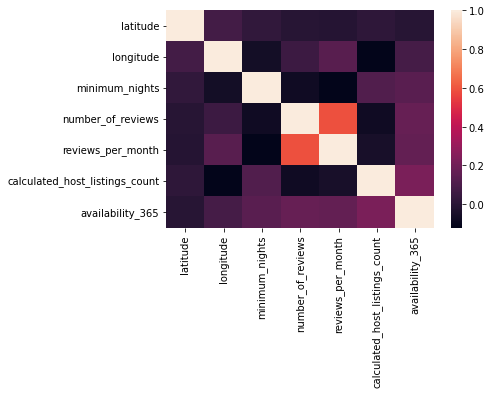

In [23]:
sns.heatmap(corr)

In [24]:
max_corr = -1
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
  for j in range(i+1, corr.shape[0]):
    if corr.iloc[i,j] < 1.00 and  corr.iloc[i,j] > max_corr:
      max_corr = corr.iloc[i,j]
      print("Max corr is : ", max_corr, ' for :(', i,",", j, ")")

Max corr is :  0.08030088258320403  for :( 0 , 1 )
Max corr is :  0.13464215986454384  for :( 1 , 4 )
Max corr is :  0.13890125161845288  for :( 2 , 6 )
Max corr is :  0.5903739015971261  for :( 3 , 4 )


###### The answer: number_of_reviews and reviews_per_month

### Make price binary

In [25]:
y_train.max()

10000

In [26]:
def make_binary(series):
  series = series.copy()
  for i in range(len(series)):
   series[i] = np.binary_repr(series[i])
  return series

In [27]:
y_train_binary = make_binary(y_train)

In [28]:
y_train[:5]

array([ 99,  57,  70, 130, 110])

In [29]:
y_train_binary[:5]

array([ 1100011,   111001,  1000110, 10000010,  1101110])

In [30]:
#Let's create a variable above_average which is 1 if the price is above (or equal to) 152. 
bin_price_val = (y_val >= 152).astype(int)
bin_price_train = (y_train >= 152).astype(int)
bin_price_test = (y_test >= 152).astype(int)

### Question 3
##### Which of these two variables has bigger score?
*   Calculate the mutual information score with the (binarized) price for the two categorical variables that we have. Use the training set only.
*   Round it to 2 decimal digits using round(score, 2)





In [32]:
from sklearn.metrics import mutual_info_score

def calculate_mutual_information(series):
  return np.round(mutual_info_score(series, bin_price_train), 2)

In [33]:
mi = df_train[categorical].apply(calculate_mutual_information)
mi.sort_values(ascending = False)

room_type              0.14
neighbourhood_group    0.05
dtype: float64

###### The answer: room_type

### Question 4
##### Calculate the accuracy on the validation dataset and rount it to 2 decimal digits.

*   Now let's train a logistic regression. Remember that we have two categorical variables in the data. Include them using one-hot encoding.
*   Fit the model on the training dataset. To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters: 
      *   model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)



In [34]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [35]:
X_train

array([[ 50.     ,  13.     ,  40.7276 , ...,   1.     ,   0.     ,
          0.     ],
       [  7.     ,   1.     ,  40.70847, ...,   0.     ,   1.     ,
          0.     ],
       [  0.     ,   1.     ,  40.83149, ...,   1.     ,   0.     ,
          0.     ],
       ...,
       [ 88.     ,   1.     ,  40.79994, ...,   0.     ,   1.     ,
          0.     ],
       [  0.     ,   1.     ,  40.69585, ...,   0.     ,   1.     ,
          0.     ],
       [281.     ,   2.     ,  40.64438, ...,   1.     ,   0.     ,
          0.     ]])

In [36]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
model.fit(X_train, bin_price_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
#Prediction on validation dataset
y_pred = model.predict_proba(X_val)[:, 1]

In [38]:
y_pred[:10]

array([0.02879082, 0.59585524, 0.42623594, 0.07493569, 0.81180978,
       0.33195823, 0.68563097, 0.54104382, 0.07675181, 0.60833048])

In [39]:
prob = (y_pred >= 0.5)
prob

array([False,  True, False, ..., False, False,  True])

In [40]:
accuracy = round((bin_price_val == prob).mean(), 2)
accuracy

0.79

###### The answer: 0.79

### Question 5
##### We have 9 features: 7 numerical features and 2 categorical. Let's find the least useful one using the feature elimination technique.
*   Train a model with all these features (using the same parameters as in Q4).
*   Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
*   For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

##### Which of following feature has the smallest difference? (neighbourhood_group, room_type, number_of_reviews, reviews_per_month)

In [42]:
elimination = ['neighbourhood_group', 'room_type', 'number_of_reviews', 'reviews_per_month']
for feature in elimination:
  df_train_temp = df_train.drop(feature, axis = 1)
  train_dict_temp = df_train_temp.to_dict(orient = 'records')
  dv_temp = DictVectorizer()
  X_train_temp = dv_temp.fit_transform(train_dict_temp)

  model.fit(X_train_temp, bin_price_train)

  df_val_temp = df_val.drop(feature, 1)
  val_dict_temp = df_val_temp.to_dict(orient = 'records')
  X_val_temp = dv_temp.fit_transform(val_dict_temp)

  y_pred_temp = model.predict(X_val_temp)
  prob_temp = (y_pred_temp >= 0.5)

  accuracy_temp = (bin_price_val == prob_temp).mean()
  diff_accuracy = abs(accuracy - accuracy_temp)
  
  print("Removing: ", feature, " yields difference of: ", round(diff_accuracy, 4))

Removing:  neighbourhood_group  yields difference of:  0.0401
Removing:  room_type  yields difference of:  0.0614
Removing:  number_of_reviews  yields difference of:  0.0012
Removing:  reviews_per_month  yields difference of:  0.0008


###### Answer: reviews_per_month

### Question 6
#####For this question, we'll see how to use a linear regression model from Scikit-Learn
*   We'll need to use the original column 'price'. Apply the logarithmic transformation to this column.
*   Fit the Ridge regression model on the training data.
*   This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]

##### Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.(If there are multiple options, select the smallest alpha.)

In [44]:
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)
y_test_log = np.log1p(y_test)

In [45]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

alphas = [0, 0.01, 0.1, 1, 10]
for i in alphas:
  model_ridge = Ridge(alpha = i)
  # Fit the Ridge regression model on the training data.
  model_ridge.fit(X_train, y_train_log)
  y_pred_ridge = model_ridge.predict(X_val) 
  rmse = np.sqrt(mean_squared_error(y_val_log, y_pred_ridge))
  print("For alpha = ", i, " RMSE is ", round(rmse, 3))

For alpha =  0  RMSE is  0.497
For alpha =  0.01  RMSE is  0.497
For alpha =  0.1  RMSE is  0.497
For alpha =  1  RMSE is  0.497
For alpha =  10  RMSE is  0.498


###### The answer: 0 (the smallest)